In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
import pandas as pd

In [3]:
from sklearn import datasets

cluster_data = pd.read_csv("Clusteranalys_15_7.csv")

In [4]:
cluster_data.columns

Index(['Pagina', 'ID', 'Visualizzazioni di pagina',
       'Visualizzazioni di pagina uniche', 'Tempo medio sulla pagina',
       'Accessi', 'Gender', 'Age', 'Device', 'Unnamed: 9'],
      dtype='object')

In [5]:
cluster_data = cluster_data.drop(columns=['Pagina', 'ID', 'Visualizzazioni di pagina',
       'Visualizzazioni di pagina uniche', 'Tempo medio sulla pagina',
       'Accessi'])

In [6]:
cluster_data = cluster_data.drop(columns= "Unnamed: 9")

In [7]:
cluster_data.shape

(6814, 3)

In [8]:
cluster_data

,Gender,Age,Device
0,0.0,2.0,2.0
1,0.0,2.0,2.0
2,0.0,2.0,2.0
3,0.0,2.0,2.0
4,0.0,2.0,2.0
...,...,...,...
6809,NaN,NaN,NaN
6810,NaN,NaN,NaN
6811,NaN,NaN,NaN
6812,NaN,NaN,NaN


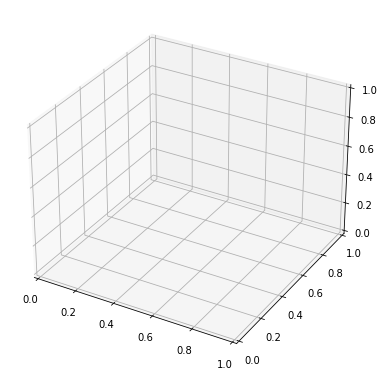

In [9]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

x = cluster_data.iloc[:,0]
y = cluster_data.iloc[:,1]
z = cluster_data.iloc[:,2]

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
colors = {"Gender": "orange", "Age":"grey", "Device":"lightblue"}


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [52]:
raw_df = pd.read_csv('Cluster_Restaurant1.csv')
raw_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,Visualizzazioni di pagina,Visualizzazioni di pagina uniche,Tempo medio sulla pagina,Accessi,Gender,Age,Device,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,C10001,40.900749,0.818182,95.40,0.00,1267.0,883.0,42.0,861.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,C10002,3202.467416,0.909091,0.00,0.00,1267.0,883.0,43.0,861.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,C10003,2495.148862,1.000000,773.17,773.17,1267.0,883.0,44.0,861.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,C10004,1666.670542,0.636364,1499.00,1499.00,1267.0,883.0,45.0,861.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,C10005,817.714335,1.000000,16.00,16.00,1267.0,883.0,46.0,861.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
raw_df = raw_df.drop(raw_df.columns[[0,1, 12,13, 14, 15, 16, 17]], axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,Visualizzazioni di pagina,Visualizzazioni di pagina uniche,Tempo medio sulla pagina,Accessi,Gender,Age,Device
0,0.818182,95.4,0.0,1267.0,883.0,42.0,861.0,0.0,2.0,2.0
1,0.909091,0.0,0.0,1267.0,883.0,43.0,861.0,0.0,2.0,2.0


In [54]:
raw_df

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,Visualizzazioni di pagina,Visualizzazioni di pagina uniche,Tempo medio sulla pagina,Accessi,Gender,Age,Device
0,0.818182,95.40,0.00,1267.0,883.0,42.0,861.0,0.0,2.0,2.0
1,0.909091,0.00,0.00,1267.0,883.0,43.0,861.0,0.0,2.0,2.0
2,1.000000,773.17,773.17,1267.0,883.0,44.0,861.0,0.0,2.0,2.0
3,0.636364,1499.00,1499.00,1267.0,883.0,45.0,861.0,0.0,2.0,2.0
4,1.000000,16.00,16.00,1267.0,883.0,46.0,861.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
6796,0.454545,62.00,0.00,49.0,37.0,65.0,37.0,0.0,5.0,2.0
6797,1.000000,145.58,0.00,49.0,37.0,65.0,37.0,0.0,5.0,2.0
6798,1.000000,3181.47,1588.78,49.0,37.0,65.0,37.0,0.0,5.0,2.0
6799,1.000000,1446.44,1093.24,49.0,37.0,65.0,37.0,0.0,5.0,2.0


In [57]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(20)

,P1,P2
0,0.990532,0.028254
1,0.989098,0.028311
2,1.014973,0.025759
3,1.024308,0.022903
4,0.991139,0.028050
5,1.009415,0.025940
6,0.836904,0.003102
7,0.999801,0.027264
8,1.017654,0.025391
9,1.025915,0.023334


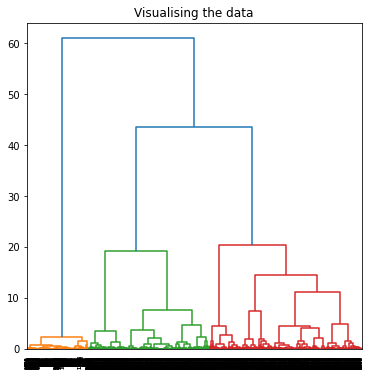

In [58]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

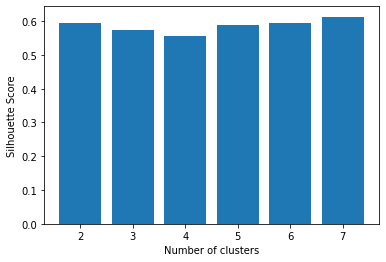

In [59]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [60]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

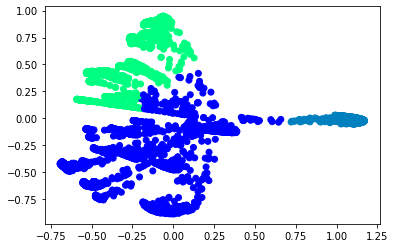

In [61]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 